# DNN: analysis with Keras of 2D data

In [2]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout

import matplotlib as mpl
mpl.rc('image', cmap='copper')
import matplotlib.pyplot as plt
# default font
plt.rcParams['font.size'] = 15

%run nonlinear_function.py

# training data
perc_train = 0.8

2
[-31.60811883 -29.54397214] 0.0
[6.77250291 9.5544703 ] 1.0
[46.45145197 15.31770969] 1.0
[24.89066375 15.35698709] 0.0
[24.77148093 46.13067361] 1.0
[-49.16117021 -39.35556233] 0.0
[-20.12962862  15.64111831] 1.0
[30.98125525 37.21759137] 1.0
[46.46475974 22.36853469] 1.0
[14.24753279 21.74536208] 0.0
data: 4000
train: 3200


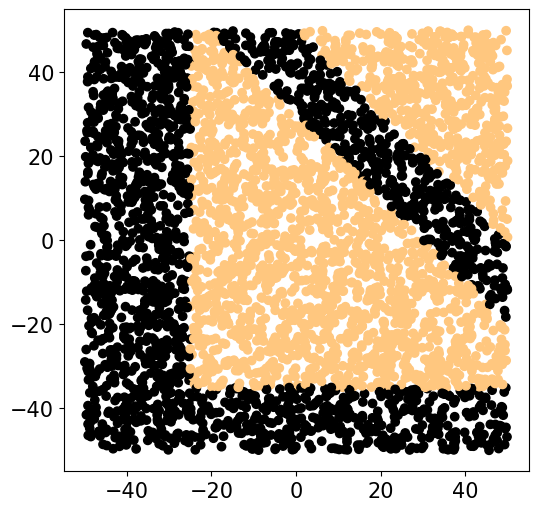

In [32]:
# Keras works with numpy arrays: just use them from the start
TYPE=1
x = np.loadtxt(filename("data",TYPE), delimiter=' ')
y = np.loadtxt(filename("labels",TYPE), delimiter=' ')
N = len(x)

# dim. of a sample
L = len(x[0])
print(L)

for i in range(10):
    print(x[i],y[i])

N_train = int(perc_train * N)
print(f'data: {N}\ntrain: {N_train}')

plt.figure(figsize = (6,6))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

### Split training and test data

In [33]:
(x_train, y_train) = (x[0:N_train],y[0:N_train])
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 3200 	 Validation: 800


### Rescale input data

In [34]:
def Rescale(x):
    #return (x-x.mean())/np.sqrt(x.var())
    return x/50

x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

### Define the model with Keras / Tensorflow

In [35]:
# reproducibility
np.random.seed(12345)
import tensorflow.random as tf_r
tf_r.set_seed(12345)

CASE=1

if CASE==1:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dropout(0.01))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
# as case 1 but one layer shorter
if CASE==2:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dropout(0.01))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
    
if CASE==10:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='sigmoid'))
    model.add(Dense(6,activation='sigmoid'))
    model.add(Dense(2,activation='sigmoid'))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
    
if CASE==20:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='linear'))
    model.add(Dense(5,activation='tanh'))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 2)                 6         
                                                                 
 dense_11 (Dense)            (None, 20)                60        
                                                                 
 dense_12 (Dense)            (None, 20)                420       
                                                                 
 dense_13 (Dense)            (None, 20)                420       
                                                                 
 dropout_2 (Dropout)         (None, 20)                0         
                                                                 
 dense_14 (Dense)            (None, 1)                 21        
                                                                 
Total params: 927
Trainable params: 927
Non-trainable 

### Optimization method and cost function

In [36]:
model.compile(loss='binary_crossentropy',
              #optimizer='RMSprop',
              optimizer='adam',
              metrics=['accuracy'])

### Training

In [41]:
fit = model.fit(x_train, y_train,
               epochs = nepoch, batch_size = 50,
               validation_data=(x_valid,y_valid),
               verbose=2)

Epoch 1/400
64/64 - 0s - loss: 0.2723 - accuracy: 0.8844 - val_loss: 0.2463 - val_accuracy: 0.8950 - 75ms/epoch - 1ms/step
Epoch 2/400
64/64 - 0s - loss: 0.2717 - accuracy: 0.8856 - val_loss: 0.2473 - val_accuracy: 0.8950 - 56ms/epoch - 881us/step
Epoch 3/400
64/64 - 0s - loss: 0.2701 - accuracy: 0.8850 - val_loss: 0.2483 - val_accuracy: 0.8938 - 55ms/epoch - 865us/step
Epoch 4/400
64/64 - 0s - loss: 0.2716 - accuracy: 0.8853 - val_loss: 0.2457 - val_accuracy: 0.8950 - 55ms/epoch - 865us/step
Epoch 5/400
64/64 - 0s - loss: 0.2733 - accuracy: 0.8831 - val_loss: 0.2514 - val_accuracy: 0.8925 - 54ms/epoch - 844us/step
Epoch 6/400
64/64 - 0s - loss: 0.2725 - accuracy: 0.8850 - val_loss: 0.2466 - val_accuracy: 0.8975 - 54ms/epoch - 846us/step
Epoch 7/400
64/64 - 0s - loss: 0.2706 - accuracy: 0.8859 - val_loss: 0.2500 - val_accuracy: 0.8938 - 55ms/epoch - 856us/step
Epoch 8/400
64/64 - 0s - loss: 0.2725 - accuracy: 0.8838 - val_loss: 0.2467 - val_accuracy: 0.8950 - 54ms/epoch - 849us/step
Ep

Epoch 67/400
64/64 - 0s - loss: 0.2712 - accuracy: 0.8844 - val_loss: 0.2564 - val_accuracy: 0.8950 - 55ms/epoch - 858us/step
Epoch 68/400
64/64 - 0s - loss: 0.2729 - accuracy: 0.8844 - val_loss: 0.2477 - val_accuracy: 0.8963 - 54ms/epoch - 851us/step
Epoch 69/400
64/64 - 0s - loss: 0.2710 - accuracy: 0.8847 - val_loss: 0.2497 - val_accuracy: 0.8938 - 55ms/epoch - 853us/step
Epoch 70/400
64/64 - 0s - loss: 0.2697 - accuracy: 0.8859 - val_loss: 0.2612 - val_accuracy: 0.8925 - 54ms/epoch - 840us/step
Epoch 71/400
64/64 - 0s - loss: 0.2724 - accuracy: 0.8841 - val_loss: 0.2457 - val_accuracy: 0.8963 - 53ms/epoch - 834us/step
Epoch 72/400
64/64 - 0s - loss: 0.2712 - accuracy: 0.8853 - val_loss: 0.2561 - val_accuracy: 0.8925 - 54ms/epoch - 840us/step
Epoch 73/400
64/64 - 0s - loss: 0.2705 - accuracy: 0.8838 - val_loss: 0.2471 - val_accuracy: 0.8950 - 54ms/epoch - 842us/step
Epoch 74/400
64/64 - 0s - loss: 0.2711 - accuracy: 0.8850 - val_loss: 0.2494 - val_accuracy: 0.8963 - 53ms/epoch - 834

Epoch 132/400
64/64 - 0s - loss: 0.2741 - accuracy: 0.8844 - val_loss: 0.2546 - val_accuracy: 0.8925 - 54ms/epoch - 850us/step
Epoch 133/400
64/64 - 0s - loss: 0.2726 - accuracy: 0.8850 - val_loss: 0.2477 - val_accuracy: 0.8963 - 53ms/epoch - 835us/step
Epoch 134/400
64/64 - 0s - loss: 0.2710 - accuracy: 0.8850 - val_loss: 0.2522 - val_accuracy: 0.8925 - 52ms/epoch - 816us/step
Epoch 135/400
64/64 - 0s - loss: 0.2720 - accuracy: 0.8844 - val_loss: 0.2490 - val_accuracy: 0.8938 - 53ms/epoch - 833us/step
Epoch 136/400
64/64 - 0s - loss: 0.2705 - accuracy: 0.8859 - val_loss: 0.2528 - val_accuracy: 0.8925 - 53ms/epoch - 822us/step
Epoch 137/400
64/64 - 0s - loss: 0.2765 - accuracy: 0.8819 - val_loss: 0.2498 - val_accuracy: 0.8938 - 53ms/epoch - 825us/step
Epoch 138/400
64/64 - 0s - loss: 0.2708 - accuracy: 0.8853 - val_loss: 0.2547 - val_accuracy: 0.8938 - 53ms/epoch - 827us/step
Epoch 139/400
64/64 - 0s - loss: 0.2761 - accuracy: 0.8838 - val_loss: 0.2489 - val_accuracy: 0.8925 - 52ms/epo

Epoch 197/400
64/64 - 0s - loss: 0.2707 - accuracy: 0.8853 - val_loss: 0.2464 - val_accuracy: 0.8950 - 56ms/epoch - 875us/step
Epoch 198/400
64/64 - 0s - loss: 0.2697 - accuracy: 0.8850 - val_loss: 0.2515 - val_accuracy: 0.8963 - 54ms/epoch - 848us/step
Epoch 199/400
64/64 - 0s - loss: 0.2711 - accuracy: 0.8853 - val_loss: 0.2488 - val_accuracy: 0.8938 - 54ms/epoch - 838us/step
Epoch 200/400
64/64 - 0s - loss: 0.2718 - accuracy: 0.8850 - val_loss: 0.2490 - val_accuracy: 0.8950 - 54ms/epoch - 845us/step
Epoch 201/400
64/64 - 0s - loss: 0.2727 - accuracy: 0.8844 - val_loss: 0.2488 - val_accuracy: 0.8925 - 53ms/epoch - 830us/step
Epoch 202/400
64/64 - 0s - loss: 0.2720 - accuracy: 0.8844 - val_loss: 0.2470 - val_accuracy: 0.8963 - 53ms/epoch - 826us/step
Epoch 203/400
64/64 - 0s - loss: 0.2723 - accuracy: 0.8838 - val_loss: 0.2486 - val_accuracy: 0.8938 - 53ms/epoch - 834us/step
Epoch 204/400
64/64 - 0s - loss: 0.2708 - accuracy: 0.8853 - val_loss: 0.2518 - val_accuracy: 0.8950 - 53ms/epo

Epoch 262/400
64/64 - 0s - loss: 0.2708 - accuracy: 0.8853 - val_loss: 0.2449 - val_accuracy: 0.8975 - 55ms/epoch - 860us/step
Epoch 263/400
64/64 - 0s - loss: 0.2717 - accuracy: 0.8834 - val_loss: 0.2533 - val_accuracy: 0.8925 - 53ms/epoch - 825us/step
Epoch 264/400
64/64 - 0s - loss: 0.2706 - accuracy: 0.8853 - val_loss: 0.2489 - val_accuracy: 0.8963 - 54ms/epoch - 846us/step
Epoch 265/400
64/64 - 0s - loss: 0.2730 - accuracy: 0.8844 - val_loss: 0.2463 - val_accuracy: 0.8950 - 55ms/epoch - 852us/step
Epoch 266/400
64/64 - 0s - loss: 0.2710 - accuracy: 0.8853 - val_loss: 0.2478 - val_accuracy: 0.8950 - 55ms/epoch - 858us/step
Epoch 267/400
64/64 - 0s - loss: 0.2709 - accuracy: 0.8847 - val_loss: 0.2594 - val_accuracy: 0.8925 - 53ms/epoch - 833us/step
Epoch 268/400
64/64 - 0s - loss: 0.2725 - accuracy: 0.8850 - val_loss: 0.2518 - val_accuracy: 0.8938 - 54ms/epoch - 837us/step
Epoch 269/400
64/64 - 0s - loss: 0.2702 - accuracy: 0.8856 - val_loss: 0.2484 - val_accuracy: 0.8950 - 54ms/epo

Epoch 327/400
64/64 - 0s - loss: 0.2721 - accuracy: 0.8844 - val_loss: 0.2477 - val_accuracy: 0.8963 - 54ms/epoch - 849us/step
Epoch 328/400
64/64 - 0s - loss: 0.2692 - accuracy: 0.8853 - val_loss: 0.2533 - val_accuracy: 0.8963 - 54ms/epoch - 845us/step
Epoch 329/400
64/64 - 0s - loss: 0.2722 - accuracy: 0.8838 - val_loss: 0.2486 - val_accuracy: 0.8963 - 55ms/epoch - 856us/step
Epoch 330/400
64/64 - 0s - loss: 0.2729 - accuracy: 0.8841 - val_loss: 0.2497 - val_accuracy: 0.8925 - 53ms/epoch - 827us/step
Epoch 331/400
64/64 - 0s - loss: 0.2704 - accuracy: 0.8856 - val_loss: 0.2462 - val_accuracy: 0.8975 - 54ms/epoch - 844us/step
Epoch 332/400
64/64 - 0s - loss: 0.2739 - accuracy: 0.8825 - val_loss: 0.2519 - val_accuracy: 0.8950 - 53ms/epoch - 828us/step
Epoch 333/400
64/64 - 0s - loss: 0.2692 - accuracy: 0.8844 - val_loss: 0.2450 - val_accuracy: 0.8963 - 54ms/epoch - 848us/step
Epoch 334/400
64/64 - 0s - loss: 0.2715 - accuracy: 0.8853 - val_loss: 0.2544 - val_accuracy: 0.8913 - 54ms/epo

Epoch 392/400
64/64 - 0s - loss: 0.2695 - accuracy: 0.8847 - val_loss: 0.2602 - val_accuracy: 0.8925 - 54ms/epoch - 851us/step
Epoch 393/400
64/64 - 0s - loss: 0.2707 - accuracy: 0.8850 - val_loss: 0.2468 - val_accuracy: 0.8963 - 54ms/epoch - 842us/step
Epoch 394/400
64/64 - 0s - loss: 0.2726 - accuracy: 0.8831 - val_loss: 0.2569 - val_accuracy: 0.8913 - 54ms/epoch - 841us/step
Epoch 395/400
64/64 - 0s - loss: 0.2701 - accuracy: 0.8847 - val_loss: 0.2471 - val_accuracy: 0.8975 - 53ms/epoch - 826us/step
Epoch 396/400
64/64 - 0s - loss: 0.2703 - accuracy: 0.8853 - val_loss: 0.2479 - val_accuracy: 0.8938 - 54ms/epoch - 841us/step
Epoch 397/400
64/64 - 0s - loss: 0.2735 - accuracy: 0.8834 - val_loss: 0.2492 - val_accuracy: 0.8963 - 53ms/epoch - 833us/step
Epoch 398/400
64/64 - 0s - loss: 0.2718 - accuracy: 0.8844 - val_loss: 0.2478 - val_accuracy: 0.8975 - 53ms/epoch - 832us/step
Epoch 399/400
64/64 - 0s - loss: 0.2698 - accuracy: 0.8850 - val_loss: 0.2502 - val_accuracy: 0.8963 - 52ms/epo

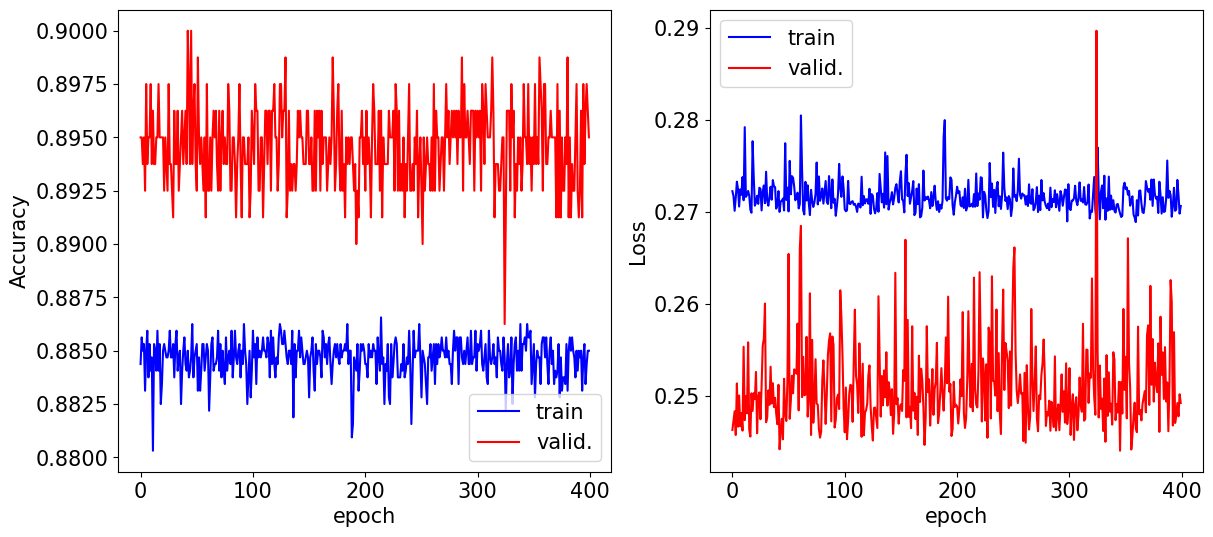

In [42]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train",c="b")
ax.plot(fit.history['val_accuracy'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax=AX[1]
ax.plot(fit.history['loss'],label="train",c="b")
ax.plot(fit.history['val_loss'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()
plt.show()

In [43]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

# RESCALE

grid_r = grid/50

pred = model.predict(grid_r)

51 2601
[50. 50.]
82/82 [==============================] - 0s 402us/step


<function matplotlib.pyplot.show(close=None, block=None)>

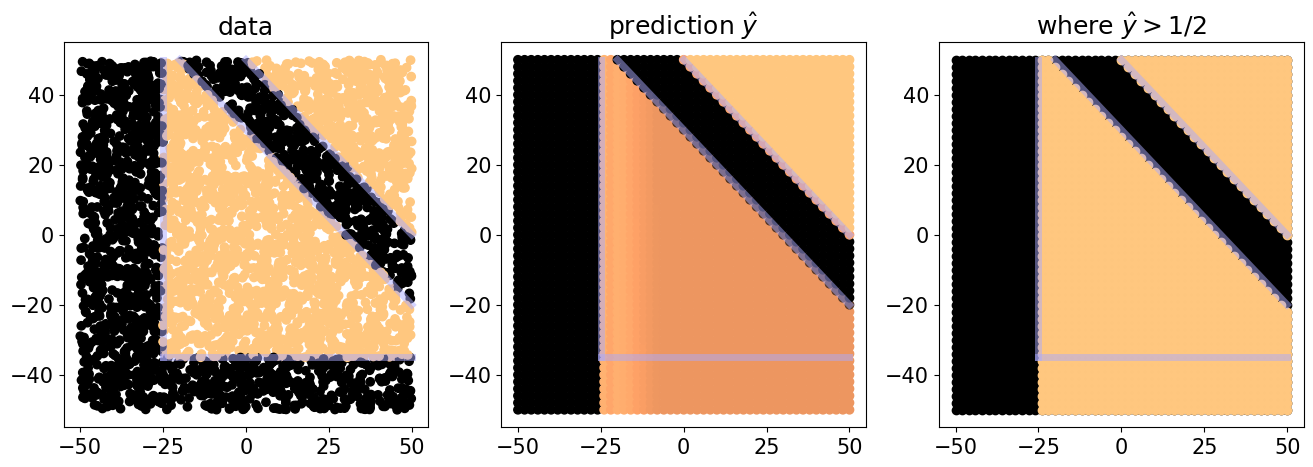

In [45]:
def boundaries():  
    x1=-25
    y1=-35
    c="#AAAAFF"
    a=0.5
    lw=5
    ax.plot((50,-20),(-20,50),c=c,alpha=a,lw=lw)
    ax.plot((50,0),(0,50),c=c,alpha=a,lw=lw)
    ax.plot((x1,50),(y1,y1),c=c,alpha=a,lw=lw)
    ax.plot((x1,x1),(y1,50),c=c,alpha=a,lw=lw)
fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x[:,0],x[:,1],c=y)
boundaries()
ax.set_title("data")
ax=AX[1]
ax.scatter(grid[:,0],grid[:,1],c=pred)
boundaries()
ax.set_title("prediction $\\hat y$")
ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#000000")
ax.scatter(grid[W1,0],grid[W1,1],c="#ffc77f")
boundaries()
ax.set_title("where $\\hat y > 1/2$")
plt.show
plt.show